# 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data prep for regression analysis
#### 3. Regression analysis
#### Bonus: performance improvement after removing outliers

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# importing data sets
path=r'/Users/isabelgonzalez/Desktop/Data Immersion/Achievement 6'

In [4]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'boat_sales_clean.csv'))

## 2. Data prep for regression analysis

### Hypothesis: The lower the price of the boat the more views it will have.

In [5]:
df=df[df['Eur Price'] < 10000000]

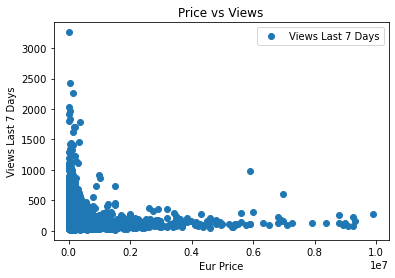

In [44]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Eur Price', y='Views Last 7 Days',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price vs Views')  
plt.xlabel('Eur Price')  
plt.ylabel('Views Last 7 Days')  
plt.show()

In [45]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Eur Price'].values.reshape(-1,1)
y = df['Views Last 7 Days'].values.reshape(-1,1)

In [46]:
X

array([[3476.04],
       [3490.  ],
       [3927.08],
       ...,
       [4499.  ],
       [4300.  ],
       [3937.5 ]])

In [47]:
y

array([[226],
       [ 75],
       [124],
       ...,
       [354],
       [266],
       [194]])

In [48]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 3. Regression analysis

In [49]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [50]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [51]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

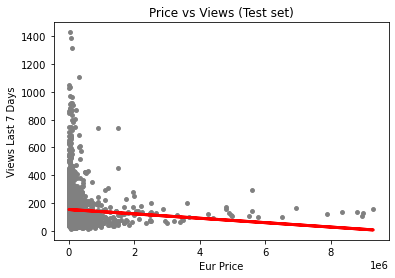

In [52]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs Views (Test set)')
plot_test.xlabel('Eur Price')
plot_test.ylabel('Views Last 7 Days')
plot_test.show()

 #### Write your own interpretation of how well the line appears to fit the dat
 The data seems to be all over the place and not fit too well

In [53]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [54]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.5850522e-05]]
Mean squared error:  17581.036687712
R2 score:  0.005204436664706713


In [55]:
y_predicted

array([[152.1200642 ],
       [148.31593892],
       [151.15318236],
       ...,
       [149.90000046],
       [150.37650678],
       [150.44149392]])

In [56]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,80,152.120064
1,110,148.315939
2,193,151.153182
3,107,150.281404
4,57,150.852022
5,112,152.532178
6,78,144.812974
7,55,151.914007
8,80,145.684752
9,410,149.726635


##### Compare how the regression fits the training set

In [57]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [58]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [59]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.5850522e-05]]
Mean squared error:  23898.562194983377
R2 score:  0.00378251834006349


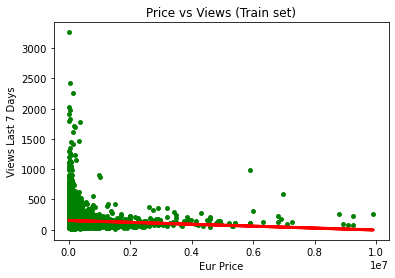

In [60]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price vs Views (Train set)')
plot_test.xlabel('Eur Price')
plot_test.ylabel('Views Last 7 Days')
plot_test.show()

#### Include your thoughts on how well the model performed on the test set in a markdown cell. Include any reflections you have on the impact of possible data bias.


The mse is very high meaning the regression line is far from the points. The r2 value is very close to 0 which indicates this model is a poor fit. We would need a model with more dimensionality if we're going to be able to accurately predict what causes views to increase. 

After looking at the results, it’s pretty clear the model isn’t performing too well. 

We can also rule out the hypothesis, "The lower the price of the boat the more views it will have."